# Lab 3
# Parametric classification
# ---------------------------------------------------

<h2>Table of contents </h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction</li>
    <li> Simple logistic regression  </li>
    <li> Multivariable logistic regression </li>
    <li> Logistic regression with regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Assume that you want to design a parametric classification model on a set of observation, where each observation is described in terms of a set of variables. Without knowing anything else about the data set, provide a reasoned justification:

(a) Explain in your own words what is the main difference between supervised learning methods and unsupervised learning methods.  Give an example of application of each type of method. Briefly describe the input and output variables you would consider in each example.

b) Explain in your own words the main difference between soft and hard output of a learning model. Indicate which of the methods presented in theory provide a soft output and which provide a hard output.

c) Explain the concept of overfitting and generalization. If you wish, you may support your answer with a diagram or drawing. Explain in your own words how you could make the designed model generalize well.



For the development of this first practice we will analyze the "Pima Indian Diabetes" database already preprocessed, where the rows of the file correspond to the observations and the columns to the variables.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross-validation will be considered.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Load the dataset (already preprocessed)
data = pd.read_csv("pima_indian_diabetes_preprocess.csv") #We can change this database


# Define the input and the output
y = data['Outcome']
X = data.drop('Outcome', axis=1)

In [3]:
# Show the first rows of the input
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory_Adult1,AgeCategory_Adult2,AgeCategory_Elderly
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0,1,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1,0,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,1,0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,0,0


In [4]:
# Show the first rows of the output
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
# We define the training set (70% of the observations) and test set (30% of the observations).
# We use a fixed value of Random state to obtain always the same results.
# For more details, see the following link: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print('Tamaños de los subsets:')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Tamaños de los subsets:
(700, 11)
(700,)
(300, 11)
(300,)


In [6]:
# Show the first rows of the Xtrain
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory_Adult1,AgeCategory_Adult2,AgeCategory_Elderly
140,3,128.0,78.0,20.536458,79.799479,21.1,0.268,55,0,1,0
409,1,172.0,68.0,49.000000,579.000000,42.4,0.702,28,1,0,0
63,2,141.0,58.0,34.000000,128.000000,25.4,0.699,24,1,0,0
178,5,143.0,78.0,20.536458,79.799479,45.0,0.190,47,0,1,0
732,2,174.0,88.0,37.000000,120.000000,44.5,0.646,24,1,0,0


#### Define the figure of merit, for example, accuracy, sensitivity, specificity, ROC-AUC

In [7]:
# Define several figures of merit. Remember that you should also show the confusion matrix
accuracy_scores=[]
sensitivity_scores=[]
specificty_scores=[]
auc_scores=[]

## 2.  Logistic regression


(a) Design a logistic regression model using the training and test subsets described above. Clearly indicate what the desired output is.

b) Comment on the confusion matrix as well as the results obtained in terms of at least two figure of merit.

c) Indicate if the figure of merit obtained in the test set change after normalizing the variables.

d) Justify which features are more relevant in this case.


In [8]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [9]:
# Logistic regression
model = LogisticRegression()

# Train the model using X_train using only the feature 'Age' as the input
model = model.fit(np.array(X_train['Age']).reshape(-1, 1), y_train)

# Show the intercept
intercept = model.intercept_
print(intercept)

# Show the coefficients
coefficients = model.coef_
print(coefficients)

# Predict the values using the test set. Obtain both the hard and the soft output
y_pred = model.predict(np.array(X_test['Age']).reshape(-1,1))
y_prob_pred = model.predict_proba(np.array(X_test['Age']).reshape(-1,1))

# Show the results
print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')

[-1.41817933]
[[0.04326167]]
Y_pred: [0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0] 
y_prob_pred: [[0.61453669 0.38546331]
 [0.58337353 0.41662647]
 [0.30334334 0.69665666]
 [0.48682371 0.51317629]
 [0.34110345 0.65889655]
 [0.55152955 0.44847045]
 [0.51925738 0.48074262]
 [0.60423939 0.39576061]
 [0.40159811 0.59840189]
 [0.62473246 0.37526754]
 [0.50845068 0.49154932]
 [0.61453669 0.38546331]
 [0.40159811 0.59840189]
 [0.38099336 0

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
#  Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'tn: {cm[1][1]}, fp:{cm[0][1]}, fn:{cm[1]}, tp:{cm[0][0]}')

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print("Accuracy:", accuracy)

# Compute sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
sensitivity_scores.append(sensitivity)
print("Sensitivity (Recall):", sensitivity)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Non-diabetic', 'Diabetic'])
print(report)

[[114  45]
 [ 63  78]]
tn: 78, fp:45, fn:[63 78], tp:114
Accuracy: 0.64
Sensitivity (Recall): 0.5531914893617021
              precision    recall  f1-score   support

Non-diabetic       0.64      0.72      0.68       159
    Diabetic       0.63      0.55      0.59       141

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.63       300
weighted avg       0.64      0.64      0.64       300



ROC AUC Score: 0.635086310718587


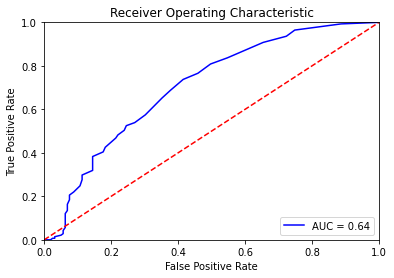

In [12]:
# Compute the AUC and the ROC
roc_auc = roc_auc_score(y_test, y_pred)
auc_scores.append(roc_auc)
print("ROC AUC Score:", roc_auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred[:, 1])


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
# Normalize your data
# Normalize using StandardScaler() - Important, note that you have two sets train and test

from sklearn.preprocessing import StandardScaler

print('\n---Sin normalizar---')
print('Primeras 10 filas y 5 columnas de cada subset:')
print(X_train)

print(X_test)

# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('\n---Normalizar---')
print('Primeras 10 filas y 5 columnas de cada subset:')
print(X_train)
print(X_test)


---Sin normalizar---
Primeras 10 filas y 5 columnas de cada subset:
     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
140            3  128.000000      78.000000      20.536458   79.799479   
409            1  172.000000      68.000000      49.000000  579.000000   
63             2  141.000000      58.000000      34.000000  128.000000   
178            5  143.000000      78.000000      20.536458   79.799479   
732            2  174.000000      88.000000      37.000000  120.000000   
..           ...         ...            ...            ...         ...   
924            0  138.895469      69.105469      20.536458   79.799479   
223            7  142.000000      60.000000      33.000000  190.000000   
271            2  108.000000      62.000000      32.000000   56.000000   
474            4  114.000000      64.000000      20.536458   79.799479   
355            9  165.000000      88.000000      20.536458   79.799479   

           BMI  DiabetesPedigreeFunction  

## 3. Multivariable Logistic Regression

Should you use your normalized data?

In [14]:
# Logistic regression
model = LogisticRegression()

# Train the model using X_train using only the feature 'Age' as the input
model = model.fit(X_train, y_train)

# Show the intercept
intercept = model.intercept_
print(intercept)

# Show the coefficients
coefficients = model.coef_
print(coefficients)

# Predict the values using the test set. Obtain both the hard and the soft output
y_pred = model.predict(X_test)
y_prob_pred = model.predict_proba(X_test)

#  Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'tn: {cm[1][1]}, fp:{cm[0][1]}, fn:{cm[1]}, tp:{cm[0][0]}')

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print("Accuracy:", accuracy)

# Compute sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
sensitivity_scores.append(sensitivity)
print("Sensitivity (Recall):", sensitivity)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Non-diabetic', 'Diabetic'])
print(report)

[0.21970408]
[[ 2.76090549e-01  1.10958465e+00 -2.34636740e-01 -1.14873152e-03
  -2.79871294e-01  7.51833832e-01  3.88063780e-01  2.64324459e-01
  -1.38444684e+00 -1.24795377e+00 -5.05484119e-01]]
[[121  38]
 [ 30 111]]
tn: 111, fp:38, fn:[ 30 111], tp:121
Accuracy: 0.7733333333333333
Sensitivity (Recall): 0.7872340425531915
              precision    recall  f1-score   support

Non-diabetic       0.80      0.76      0.78       159
    Diabetic       0.74      0.79      0.77       141

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [21]:
print(y_pred)

[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1
 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 0 1 

ROC AUC Score: 0.7741201659306838


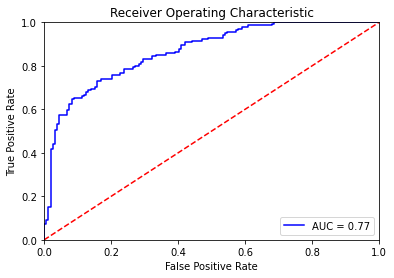

In [15]:
# Compute the AUC and the ROC
roc_auc = roc_auc_score(y_test, y_pred)
auc_scores.append(roc_auc)
print("ROC AUC Score:", roc_auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred[:, 1])


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Important! You can explore what results are obtained when: (1) you normalize the variables; (2) you discard some features based on the value of their coefficients; (3) you use other approaches such as stats.

## 4. Logistic regression with regularization

a) Indicate whether the performance obtained in the test set changes when Ridge or Lasso are considered.

b) Justify which characteristics are more relevant for these models.

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': np.linspace(1e-4, 10, 100),  # Range of regularization strengths
    'penalty': ['l1', 'l2']          # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
}

# Create the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

# Predict using the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)  # Replace X_test with your test data

Best Parameters: {'C': 0.2021181818181818, 'penalty': 'l2'}
Best Score (Accuracy): 0.7385714285714287


In [17]:
#  Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'tn: {cm[1][1]}, fp:{cm[0][1]}, fn:{cm[1]}, tp:{cm[0][0]}')

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print("Accuracy:", accuracy)

# Compute sensitivity (recall)
sensitivity = recall_score(y_test, y_pred)
sensitivity_scores.append(sensitivity)
print("Sensitivity (Recall):", sensitivity)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Non-diabetic', 'Diabetic'])
print(report)

[[120  39]
 [ 31 110]]
tn: 110, fp:39, fn:[ 31 110], tp:120
Accuracy: 0.7666666666666667
Sensitivity (Recall): 0.7801418439716312
              precision    recall  f1-score   support

Non-diabetic       0.79      0.75      0.77       159
    Diabetic       0.74      0.78      0.76       141

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [27]:
print(y_pred)

[0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0
 0 0 1 1]


ROC AUC Score: 0.7674294125518534


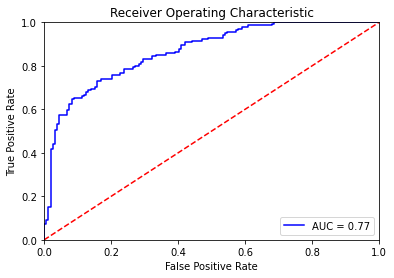

In [18]:
# Compute the AUC and the ROC
roc_auc = roc_auc_score(y_test, y_pred)
auc_scores.append(roc_auc)
print("ROC AUC Score:", roc_auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred[:, 1])


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Comparison of the results obtained with the different models


Include in a table the performances of the test set obtained according to different figures of merit:

In view of the results obtained, answer, if possible, the following questions:

(a) Justify with which scheme of those analyzed you obtain better performances in the test set.

b) Justify the influence of the regularization parameter on the results obtained.

c) Justify reasonably if the fact of making a single partition of the cases in the training and test sets can influence the results obtained.

d) Starting from the original data, perform a new partition of the cases in the training and test sets. Select one of the classifiers analyzed (indicate the classifier chosen) and obtain again the confusion matrix and the evaluation measures. Comment on the results obtained.


In [18]:
accuracy_scores

[0.64]

In [20]:
accuracy_scores

[0.64, 0.7733333333333333, 0.7666666666666667]

In [21]:
results = pd.DataFrame()

results["Accuracy in the test set"] = accuracy_scores
results["Sensitivity in the test set"] = sensitivity_scores
results["AUC in the test set"] = auc_scores

#results
results["Models"] = ["Logistic Regression (LR)", "Multivariable LR", "MLR with regularization"]
results.set_index("Models", inplace = True)

In [22]:
results

,Accuracy in the test set,Sensitivity in the test set,AUC in the test set
Models,,,
Logistic Regression (LR),0.640000,0.553191,0.635086
Multivariable LR,0.773333,0.787234,0.774120
MLR with regularization,0.766667,0.780142,0.767429
